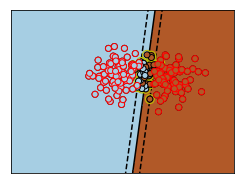

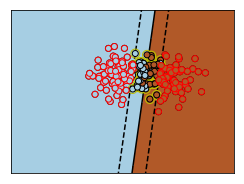

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[1])
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import setup

is_windows = sys.platform.startswith('win')
sep = '\\'

if is_windows == False:
    sep = '/'

path = os.getcwd()+sep+'data'+sep

#sinthetic
X, Y, description = setup.load2CHT(path, sep)
X = X[0:200]
Y = Y[0:200]
'''    
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
'''
# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='y')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    '''
    print(len(clf.support_), clf.support_)
    
    print("X= ",len(X), X)
    #points = np.delete(X, clf.support_)
    dif = [i for i in range(0,len(X))]
    dif = np.setdiff1d(dif, clf.support_)
    points = X[dif]
    print("new X= ",len(points), points)
    '''
    dif = [i for i in range(0,len(X))]
    dif = np.setdiff1d(dif, clf.support_)
    points = X[dif]
    
    plt.scatter(points[:, 0], points[:, 1], c=Y[dif], zorder=10, cmap=plt.cm.Paired,
                edgecolors='r')
    
    x_min = -10
    x_max = 10
    y_min = -10
    y_max = 10
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()



#np.setdiff1d(arr1, arr2)